### Analysis of Second Order Action

The purpose of this notebook is to analyze and construct the second-order action, combining the relevant g and f
parts while making simplifying assumptions to recover the final structure.

In [1]:
import sympy

sympy.init_printing()

In [2]:
syms = sympy.symbols("r psi theta phi")
r, psi, theta, phi = syms

In [3]:
L = sympy.symbols("L")  # AdS length scale
r_0 = sympy.symbols("r_0")

In [4]:
# spherical part of the metric
g = sympy.Function('g')(r)
dg = sympy.diff(g, r)
ddg = sympy.diff(dg, r)

In [5]:
# radial part of the metric
f = sympy.Function('f')(r)
df = sympy.diff(f, r)

In [6]:
# gauge field
Phi = sympy.Function('Phi')(r)
dPhi = sympy.diff(Phi, r)
ddPhi = sympy.diff(dPhi, r)

The Lagrangian is given by the following.

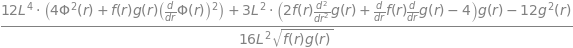

In [7]:
lagrangian = 3 * (4 * L ** 4 * (4 * Phi ** 2 + f * g * dPhi ** 2) + L ** 2 * g * (2 * f * ddg + df * dg - 4) - 4 * g ** 2) / (16 * L ** 2 * sympy.sqrt(f * g))
lagrangian

In [8]:
delta_f = sympy.Function('delta_f')(r)
ddelta_f = sympy.diff(delta_f, r)

In [9]:
delta_g = sympy.Function('delta_g')(r)
ddelta_g = sympy.diff(delta_g, r)
dddelta_g = sympy.diff(ddelta_g, r)

In [10]:
delta_Phi = sympy.Function('delta_Phi')(r)
ddelta_Phi = sympy.diff(delta_Phi, r)

Compute the Phi and g part of the action.

In [11]:
# make sure to divide appropriate terms by two so it doesn't interfere with integration by parts later
ddS_gg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), g)) / 2
ddS_phiphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, Phi), Phi)) / 2
ddS_dphidphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dPhi), dPhi)) / 2
ddS_gphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), Phi))
ddS_gdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), dg))
ddS_gdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), dPhi))
ddS_phidg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, phi), dg))
ddS_phidphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, Phi), dPhi))
ddS_dgdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dg), dg)) / 2
ddS_dgdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dg), dPhi))
ddS_gddg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), ddg))  # involves second derivative

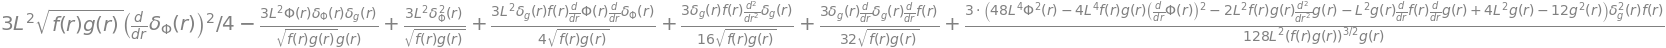

In [12]:
action_Phi_g = ( 
    delta_g ** 2 * ddS_gg +
    delta_Phi ** 2 * ddS_phiphi +
    ddelta_Phi ** 2 * ddS_dphidphi +
    delta_g * delta_Phi * ddS_gphi +
    delta_g * ddelta_g * ddS_gdg +
    delta_g * ddelta_Phi * ddS_gdphi +
    delta_Phi * ddelta_g * ddS_phidg +
    delta_Phi * ddelta_Phi * ddS_phidphi +
    ddelta_g ** 2 * ddS_dgdg +
    ddelta_g * ddelta_Phi * ddS_dgdphi +
    delta_g * dddelta_g * ddS_gddg
)
action_Phi_g

On integration by parts, the dgdg'' term will contribute terms with dg'dg' and dg'dg:

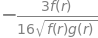

In [13]:
ddS_dgdg -= ddS_gddg
ddS_dgdg

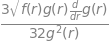

In [14]:
ddS_gdg = sympy.simplify(ddS_gdg - sympy.diff(ddS_gddg, r))
ddS_gdg

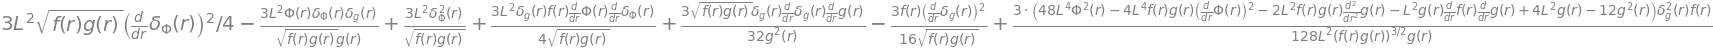

In [15]:
action_Phi_g = ( 
    delta_g ** 2 * ddS_gg +
    delta_Phi ** 2 * ddS_phiphi +
    ddelta_Phi ** 2 * ddS_dphidphi +
    delta_g * delta_Phi * ddS_gphi +
    delta_g * ddelta_g * ddS_gdg +
    delta_g * ddelta_Phi * ddS_gdphi +
    delta_Phi * ddelta_g * ddS_phidg +
    delta_Phi * ddelta_Phi * ddS_phidphi +
    ddelta_g ** 2 * ddS_dgdg +
    ddelta_g * ddelta_Phi * ddS_dgdphi
)
action_Phi_g

Introduce q.

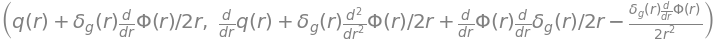

In [16]:
q = sympy.Function('q')(r)
dq = sympy.diff(q, r)
dphi = q + dPhi * delta_g / (2 * r)
dphidr = sympy.diff(dphi, r)
dphi, dphidr

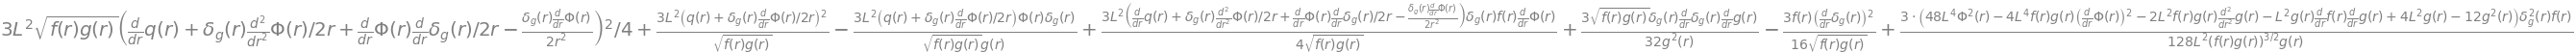

In [17]:
action_q = action_Phi_g.subs({delta_Phi: dphi, ddelta_Phi: dphidr})
action_q

The expansion of the action involving df consists of the following terms.

In [18]:
ddS_ff = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), f)) / 2
ddS_fg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), g))
ddS_fphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), Phi))
ddS_fdf = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), df))
ddS_fdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dg))
ddS_fdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dPhi))
ddS_dfg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), g))
ddS_dfdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), dg))
ddS_fddg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), ddg))  # involves second derivative

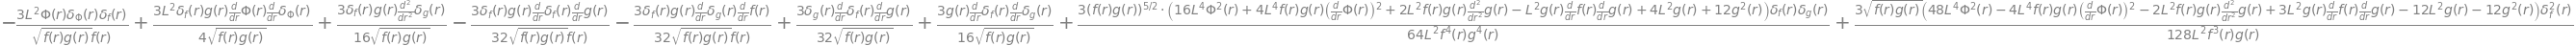

In [19]:
action_f = (
    delta_f ** 2 * ddS_ff +
    delta_f * delta_g * ddS_fg +
    delta_f * delta_Phi * ddS_fphi +
    delta_f * ddelta_f * ddS_fdf +
    delta_f * ddelta_g * ddS_fdg +
    delta_f * ddelta_Phi * ddS_fdphi +
    ddelta_f * delta_g * ddS_dfg +
    ddelta_f * ddelta_g * ddS_dfdg +
    delta_f * dddelta_g * ddS_fddg
)
action_f

Use integration by parts on the dfdf' term:

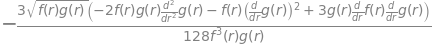

In [20]:
ddS_ff_2 = -sympy.simplify(sympy.diff(ddS_fdf, r)) / 2
ddS_ff_2

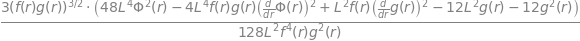

In [21]:
ddS_ff = sympy.simplify(ddS_ff + ddS_ff_2)
ddS_ff

On integration by parts, the dfdg'' term produces terms with df'dg' and dfdg':

In [22]:
ddS_dfdg -= ddS_fddg
ddS_dfdg

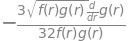

In [23]:
ddS_fdg = sympy.simplify(ddS_fdg - sympy.diff(ddS_fddg, r))
ddS_fdg

You can produce an action totally algebraic in df by integrating the df'dg term by parts, producing terms with dfdg' and dfdg:

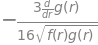

In [24]:
ddS_fdg = sympy.simplify(ddS_fdg - ddS_dfg)
ddS_fdg

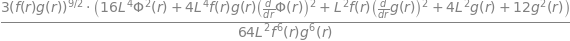

In [25]:
ddS_fg = sympy.simplify(ddS_fg - sympy.diff(ddS_dfg, r))
ddS_fg

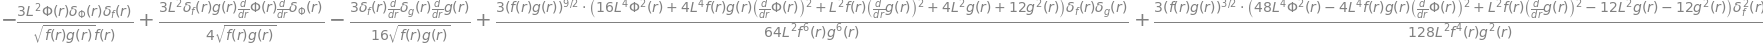

In [26]:
action_f = (
    delta_f ** 2 * ddS_ff +
    delta_f * delta_g * ddS_fg +
    delta_f * delta_Phi * ddS_fphi +
    delta_f * ddelta_g * ddS_fdg +
    delta_f * ddelta_Phi * ddS_fdphi +
    ddelta_f * ddelta_g * ddS_dfdg
)
action_f

### Quadratic Action when dg = 0

In this case, q = delta_Phi. Setting delta_g and its derivative to zero, you get:

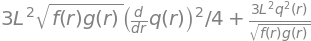

In [27]:
action_q_dg_0 = action_q.subs({delta_g: 0, ddelta_g: 0})
action_q_dg_0

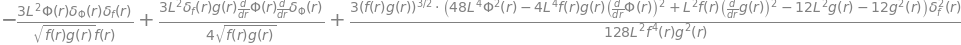

In [28]:
action_f_dg_0 = action_f.subs({delta_g: 0, ddelta_g: 0})
action_f_dg_0

Check the sign of the quadratic factor.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import ellipkinc

In [30]:
def a_b_params(phi_star):
    """Get elliptic integral parameters."""
    a = (1 + 16 * phi_star ** 2) ** (1./4)
    b = np.sqrt((a ** 2 - 1) / 2)
    return a, b

In [31]:
def phi_of_r(r_val, phi_star, L_val):
    """Get gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan(r_val / (L_val * a))
    m = 1 - a ** 2 / b ** 2
    return phi_star * np.cosh((2 / b) * ellipkinc(phi, m))

In [32]:
def dphi_of_r(r_val, phi_star, L_val):
    """Get radial derivative of gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan(r_val / (L_val * a))
    m = 1 - a ** 2 / b ** 2
    denom = np.sqrt((L_val * a * b) ** 2 + (a ** 2 + b ** 2) * r_val ** 2 + r_val ** 4 / L_val ** 2)
    return phi_star * np.sinh((2 / b) * ellipkinc(phi, m)) * 2 / denom

In [33]:
def f_of_r(r_val, L_val, r_0_val):
    return (L_val ** 2 + r_val ** 2 + 2 * r_0_val ** 2) / L_val ** 2

def g_of_r(r_val, r_0_val):
    return r_val ** 2 + r_0_val ** 2

def dg_of_r(r_val):
    return 2 * r_val

In [34]:
def ddf_factor(r_val, phi_star, L_val, r_0_val):
    phi_val = phi_of_r(r_val, phi_star, L_val)
    dphi_val = dphi_of_r(r_val, phi_star, L_val)
    f_val = f_of_r(r_val, L_val, r_0_val)
    g_val = g_of_r(r_val, r_0_val)
    dg_val = dg_of_r(r_val)

    return (
        48 * L_val ** 4 * phi_val ** 2 -
        4 * L_val ** 4 * f_val * g_val * dphi_val ** 2 +
        L_val ** 2 * f_val * dg_val ** 2 -
        12 * L_val ** 2 * g_val -
        12 * g_val ** 2
    )

In [35]:
L_val = 1
r_0_val = 2  # has to be greater than 1.25 * L
phi_star = 5  # has to be greater than 3.56

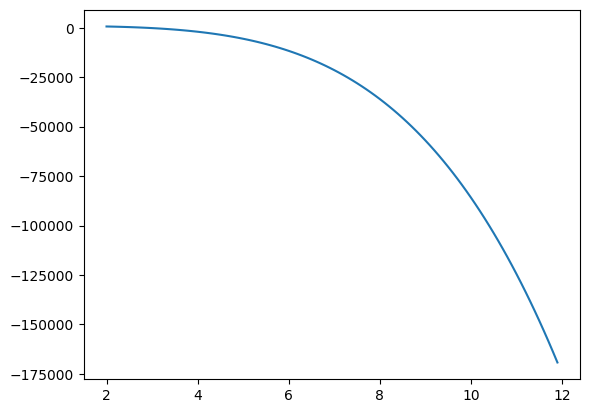

In [36]:
r_vals = np.arange(r_0_val, r_0_val + 10, 0.1)
dfs = [ddf_factor(r_val, phi_star, L_val, r_0_val) for r_val in r_vals]
plt.plot(r_vals, dfs);

It doesn't have to be negative, but in general, it is.

#### Completing the Square

The goal is to write

A * delta_f^2 + B * delta_f * delta_Phi + C * delta_f * ddelta_Phi

in the form

-(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi)^2 + c_0

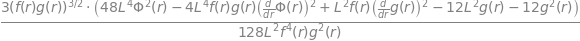

In [37]:
A = ddS_ff
A

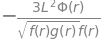

In [38]:
B = ddS_fphi
B

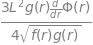

In [39]:
C = ddS_fdphi
C

The solution is:

In [40]:
a_1 = sympy.sqrt(-A)
a_2 = -B / (2 * a_1)
a_3 = -C / (2 * a_1)
c_0 = -B ** 2 * delta_Phi ** 2 / (4 * A) - B * C * delta_Phi * ddelta_Phi / (2 * A) - C ** 2 * ddelta_Phi ** 2 / (4 * A)

In [41]:
completed_square = -(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi) ** 2 + c_0

Check the solution.

In [42]:
r_val = 6

In [43]:
func_subs = {
    L: L_val,
    f: f_of_r(r_val, L_val, r_0_val),
    g: g_of_r(r_val, r_0_val),
    dg: dg_of_r(r_val),
    Phi: phi_of_r(r_val, phi_star, L_val),
    dPhi: dphi_of_r(r_val, phi_star, L_val),
}

In [44]:
action_f_dg_0.subs(func_subs)

In [45]:
sympy.simplify(completed_square.subs(func_subs))

There is indeed agreement. The extra terms to add to the Lagrangian are:

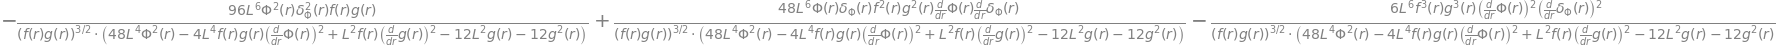

In [46]:
c_0

The extra term added to q'^2 is the last term. To get the terms added to q^2, you need to use integration by parts on the first two terms.

In [47]:
term1 = sympy.simplify(-B * C / (2 * A))
term2 = sympy.simplify(-B ** 2 / (4 * A))

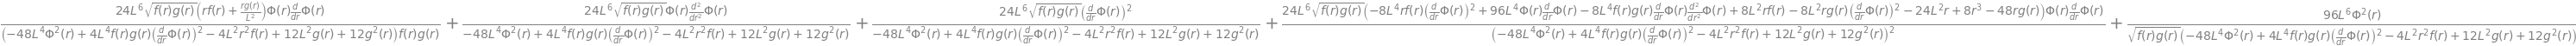

In [48]:
extra_term_qq = (term2 - sympy.diff(term1, r) / 2).subs({df: 2 * r / L ** 2, dg: 2 * r, ddg: 2})
extra_term_qq

However, these terms don't produce the result in the paper.

The final Lagrangian is:

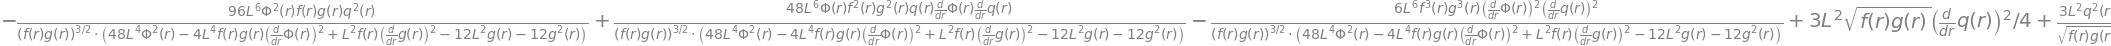

In [49]:
final_lagrangian_no_g = action_q_dg_0 + c_0.subs({delta_Phi: q, ddelta_Phi: dq})
final_lagrangian_no_g

In the paper, the factor multiplying q'^2 is given by:

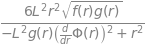

In [50]:
factor_dq_square = sympy.sqrt(f * g) * 6 * L ** 2 * r ** 2 / (r ** 2 - g * L ** 2 * dPhi ** 2)
factor_dq_square

Here, it is given by:

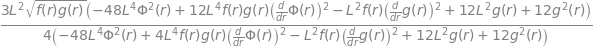

In [51]:
sympy.simplify(3 * L ** 2 * sympy.sqrt(f * g) / 4 - C ** 2 / (4 * A))

### Quadratic Action when Phi = 0

In this case, there is no source.

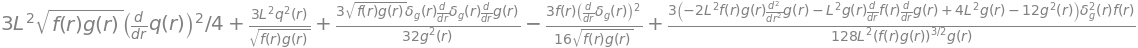

In [52]:
action_q_phi_0 = action_q.subs({Phi: 0, dPhi: 0, ddPhi: 0})
action_q_phi_0

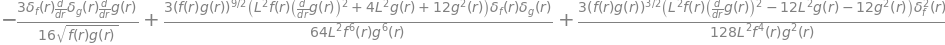

In [53]:
action_f_phi_0 = action_f.subs({Phi: 0, dPhi: 0})
action_f_phi_0

Completing the square produces:

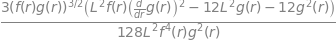

In [54]:
A2 = ddS_ff.subs({Phi: 0, dPhi: 0})
A2

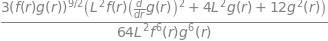

In [55]:
B2 = ddS_fg.subs({Phi: 0, dPhi: 0})
B2

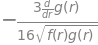

In [56]:
C2 = ddS_fdg.subs({Phi: 0, dPhi: 0})
C2

In [57]:
a_1_2 = sympy.sqrt(-A2)
a_2_2 = -B2 / (2 * a_1_2)
a_3_2 = -C2 / (2 * a_1_2)
c_0_2 = -B2 ** 2 * delta_g ** 2 / (4 * A2) - B2 * C2 * delta_g * ddelta_g / (2 * A2) - C2 ** 2 * ddelta_g ** 2 / (4 * A2)

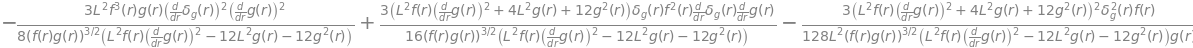

In [58]:
c_0_2

The final Lagrangian is:

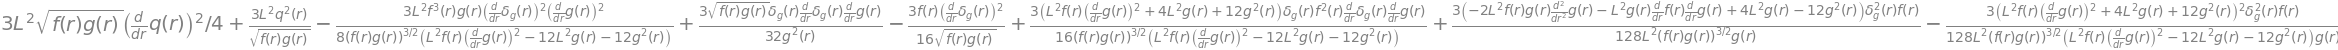

In [59]:
final_lagrangian_no_phi = action_q_phi_0 + c_0_2
final_lagrangian_no_phi

However, even if the extra terms are added, they only contribute to dg, dg' terms, but they can't get the factor in front of q^2 and q'^2 to match.

In the paper, the factor in front of q'^2 is:

In [60]:
factor_dq_square = sympy.sqrt(f * g) * 6 * L ** 2
factor_dq_square

The one in front of q^2 is:

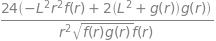

In [61]:
factor_q_square = (1 / sympy.sqrt(f * g)) * 24 * L ** 2 * ((2 * g * (L ** 2 + g) / (r ** 2 * L ** 2 * f)) - 1)
factor_q_square.simplify()